___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Karen Violeta Garcia Hernandez

## Fecha: 5 de Noviembre del 2019

## Por: Oscar David Jaramillo Z.

In [1]:
#Librerias
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy import optimize
import random
import math

# 1.
Usando la información reportada en el archivo `Datos.csv`, responda las siguientes preguntas:

a). Usando el método de quantil-quantil (Q-Q), determine la distribución de probabilidad de cada una de las columnas que se encuentran en el archivo `Datos.csv`. (**Ayuda**: en canvas en la sección de páginas, se encuentran las diferentes posibilidades de las funciones de distribución que deben de probar para verificar que distribución siguen sus datos)


In [2]:
Data = pd.read_csv('Datos.csv')
pd.set_option('display.max_rows', 10)
print(Data)

         datos 1   datos 2    datos 3
0      18.288085 -0.691956  18.767065
1      21.608963  1.044716  21.037676
2      10.495427  2.034175  20.715796
3      13.323834  1.238718  20.238103
4      15.426223  0.516238  22.838431
...          ...       ...        ...
99995  13.864582  0.056234  24.165431
99996  20.582240 -0.925942  24.156431
99997  19.420652  0.419330  21.491975
99998  12.830188  1.124992  22.287976
99999  20.928362  1.439230  20.483879

[100000 rows x 3 columns]


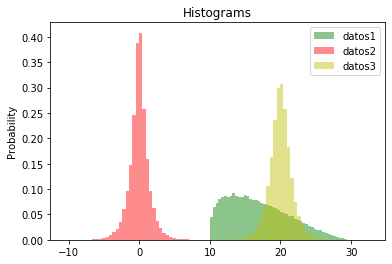

In [3]:
#Visualizar los histogramas de los datos
color = ['green', 'red', 'y']
Names = ['datos1', 'datos2', 'datos3']
[plt.hist(Data.iloc[:,i],bins = 50, density = True, color = color[i], alpha = 0.45, label = Names[i]) for i in range(3)]
plt.title("Histograms")
#plt.xlabel("Class")
plt.ylabel("Probability")
plt.legend(loc='upper right') 
plt.show()


In [16]:
#Función quantil-quantil
def Quant_Quant(Y, best_dist):
    dist = getattr(st, best_dist)
    param = dist.fit(Y)
    print('parametros! ',param)
    (slope, intercept) = st.probplot(Y, dist=best_dist, sparams=param, fit=True, plot=plt)
    
    u = np.random.rand(len(Y))
    # Comparación de quantiles númericos
    Y_n = dist.ppf(u, *param[:-2], loc=param[-2], scale=param[-1])
    q1 = np.percentile(Y,[25,50,75])
    q2 = np.percentile(Y_n,[25,50,75])
    print('Empirical quantile: ',q1)
    print('Theorical quantile: ',q2)

#Nombre de todas las distribuciones continuas de la paqueteria scipy.stats
distribution = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
print(distribution)
#Probar las siguientes:
distribution = ['alpha', 'beta', 'cauchy', 'chi', 'chi2', 'expon', 'laplace', 'levy', 'lognorm', 'norm', 't', 'triang' ]

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular', 'skewnorm', 't', 'trapz', 'tr

parametros!  (15.938306507197158, 2.814479443479487)
Empirical quantile:  [13.29239958 16.21960423 19.82328432]
Theorical quantile:  [13.10581665 15.93335135 18.76747066]

La distribución que mejor se ajusta es:  cauchy
Donde los parametros son:  (15.938306507197158, 2.814479443479487)


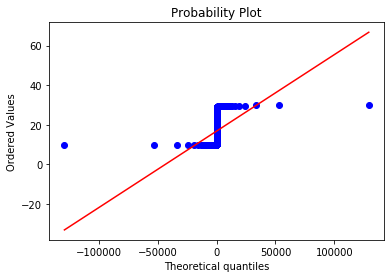

In [15]:
#Buscar la distribución que mejor se distribuye para los primeros datos
datos1 = Data.iloc[:,0]
best_dist1 = distribution[2] #Cambiarlo manualmente para no graficar las 12 distribuciones
Quant_Quant(datos1, best_dist1)
print()
print('La distribución que mejor se ajusta es: ', best_dist1)
print('Donde los parametros son: ', getattr(st, best_dist1).fit(datos1))

Empirical quantile:  [-0.69000126 -0.00315589  0.68873291]
Theorical quantile:  [-0.69782806 -0.00766712  0.67943594]

La distribución que mejor se ajusta es:  laplace
Donde los parametros son:  (-0.0031292308852936077, 0.994765118108065)


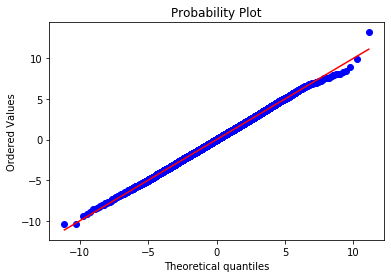

In [6]:
#Buscar la distribución que mejor se distribuye para los datos 2
datos2 = Data.iloc[:,1]
best_dist2 = distribution[6]
Quant_Quant(datos2, best_dist2)
print()
print('La distribución que mejor se ajusta es: ', best_dist2)
print('Donde los parametros son: ', getattr(st, best_dist2).fit(datos2))

Empirical quantile:  [19.11669842 20.00572146 20.89383353]
Theorical quantile:  [19.18991147 19.99948621 20.81222171]

La distribución que mejor se ajusta es:  laplace
Donde los parametros son:  (20.005718210283476, 1.1697862689490046)


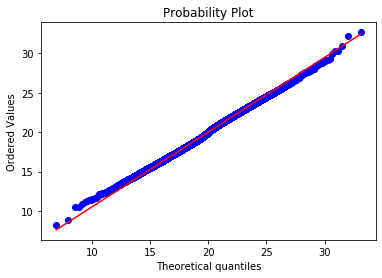

In [7]:
#Buscar la distribución que mejor se distribuye para los datos 3
datos3 = Data.iloc[:,2]
best_dist3 = distribution[6]
Quant_Quant(datos3, best_dist3)
print()
print('La distribución que mejor se ajusta es: ', best_dist3)
print('Donde los parametros son: ', getattr(st, best_dist3).fit(datos3))

b). Según los resultados concluidos con el método quantil-quantil, use el método de máxima verosimilitud en python, para estimar los parámetros `loc` y `scale` de las tres distribuciones de probabilidad ajustadas. Compare los resultados usando el histograma de los datos, (use bins=60) y su respectiva función de densidad ajustada. Los resultados esperados para cada distribución se deben de reportar como sigue: 

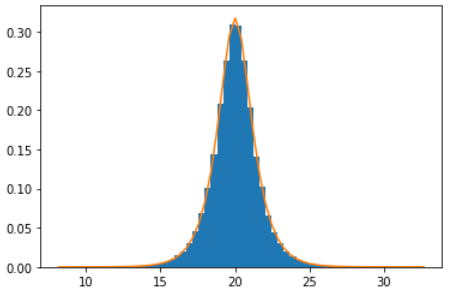

In [8]:
#Funcion que compara el histograma empirico con la linea de la mejor distribucion ajustada
def Hist_emp_Best_dist_line(Y, best_dist, title):
    dist = getattr(st, best_dist)
    x = np.linspace(min(Y),max(Y), len(Y))
    param = dist.fit(Y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    #Graficas
    plt.plot(x,pdf_fitted)
    plt.hist(Y, alpha = 0.5, density = True, bins=60)
    plt.title(title) 
    
    plt.show()

In [9]:
#Parametros de cada distribución
Best_Dist = [best_dist1, best_dist2, best_dist3]
[print('Los parametros de datos%d'%(i+1),' son: ', getattr(st, Best_Dist[i]).fit(Data.iloc[:,i])) for i in range(len(Data.iloc[0]))]

Los parametros de datos1  son:  (1.3113898608212917, 2.543945698990183, 10.00143275036596, 20.04306371654964)
Los parametros de datos2  son:  (-0.0031292308852936077, 0.994765118108065)
Los parametros de datos3  son:  (20.005718210283476, 1.1697862689490046)


[None, None, None]

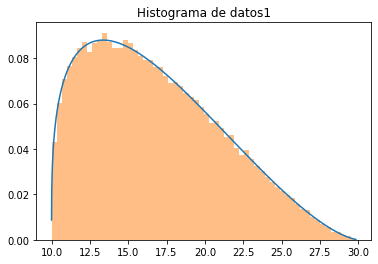

In [10]:
#Usar la funcion para los datos 1
Hist_emp_Best_dist_line(datos1, best_dist1, 'Histograma de datos1')

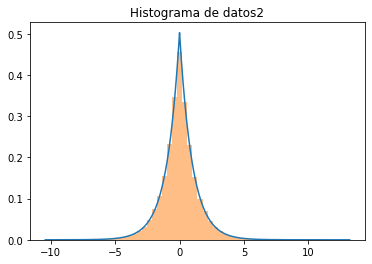

In [11]:
#Usar la funcion para los datos 2
Hist_emp_Best_dist_line(datos2, best_dist2, 'Histograma de datos2')

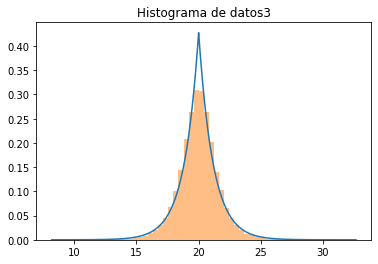

In [60]:
#Usar la funcion para los datos 3
Hist_emp_Best_dist_line(datos3, best_dist3, 'Histograma de datos3')

c). Use la prueba chi cuadrado - Usando el histograma (como se vió en clase), y los resultados del literal b) responda la siguiente prueba de hipótesis para cada distribución:
> $H_0$: la distribución es `distribución_i` con ´paramétro 1 = p1´ y ´parámetro 2 = p2 ´

> $H_a$: los datos no se distribuyen como `distribución_i`

Observe que `paramétro 1` y `paramétro 2` dependerán de cada una de las distribuciones seleccionadas, por ejemolo si la `distribución_i` fuera normal entonces  `paramétro 1` y `paramétro 2` serían la media $\mu$ y desviación estándar $\sigma$, respectivamente.**Nota:** Recuerde que el método de máxima verosimilitud puede estimar `loc` y `scale` únicamente o `loc` y `scale` y otros parámetros de la distribución a ajustar (ver por ejemplo Tarea clase 12, para aclarar).

In [13]:
#funcion de chi cuadrada
def Chi_Cuadr(Y, best_dist):
    dist = getattr(st, best_dist)
    J = len(Y)
    
    #Calcular la frecuecia sin graficar el histograma
    hist, bin_edges = np.histogram(Y, bins=(J))
    bins = bin_edges[1]-bin_edges[0]
    freq = (hist/(bins*sum(hist)))
    
    x = np.linspace(min(Y),max(Y), J)
    
    param = dist.fit(Y)
    pi = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    Y_np = np.array(Y)
    Ei = Y_np*pi
    # Calculo usando la librería estadística de la chi cuadrada

    X_chi = st.chisquare(freq,Ei)
    print('Valor de chi cuadrado librería = ',X_chi)

    # Cálculo de Grados de libertad del estadístico

    p = 2 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad

    Chi_est = st.chi2.ppf(q = 0.95,df=m)
    print('Estadístico de chi_cuadrado = ',Chi_est)

In [14]:
#Usar la funcion para los datos 1
Chi_Cuadr(datos1, best_dist1)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=75288.63823323291, pvalue=1.0)
Estadístico de chi_cuadrado =  100733.72514319631


In [15]:
#Usar la funcion para los datos 2
Chi_Cuadr(datos2, best_dist2)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=-43435.65651620398, pvalue=1.0)
Estadístico de chi_cuadrado =  100733.72514319631


In [16]:
#Usar la funcion para los datos 3
Chi_Cuadr(datos3, best_dist3)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=73880.149751204, pvalue=1.0)
Estadístico de chi_cuadrado =  100733.72514319631


<p <span style="color:gray; font-family:Times; font-size:1.2em;"> Conclusión: En el archivo se encuentran 100,000 datos en cada columna, de estos 3 datos la columna 1 (datos1) se distribuye como una beta, cuyos parametros son: α = 1.311389 β = 2.5439, loc (lower limit) = 10.0014, scale (upper limit - lower limit) = 20.043 y de hecho la prueba quantil-quantil graficamente se ve un muy buen ajuste, y con la chi-cuadrada se acepta tal premisa. Tanto para datos2 y datos3 se encontró que la distribución laplace es la que se ajusta mejor de 12 distribuciones probadas, pero con diferentes parametros, ya que para datos2 son loc = -0.003129 y scale = 0.9947 y para datos3 son loc = 20.0057 y scale = 1.16978 e igualmente la prueba chi cuadrada acepta que los datos se ajustan como una laplace.  </span></p>

# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

Realizar todo el desarrollo matemático en mardown usando ecuaciones latex.


$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$

Es posible ver que ahi se encuentra $P(k, \lambda)$, entonces
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

b). De el resultado demostrado en el inciso a) (usando la ecuación recursiva), gráfique la función de distribución de probabilidad y su función acumulada, para $\lambda = [4,10,30]$, valide sus resultados comparando con el paquete estadístico `scipy.stats`. Posteriormente, genere muestras aletorias que distribuyan poisson con el conjunto de parámetros lambda dados y realice el histograma correspondiente (en gráficas distintas para cada lambda), validando lo obtenido al graficar la función de densidad de probabilidad. **Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

In [17]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

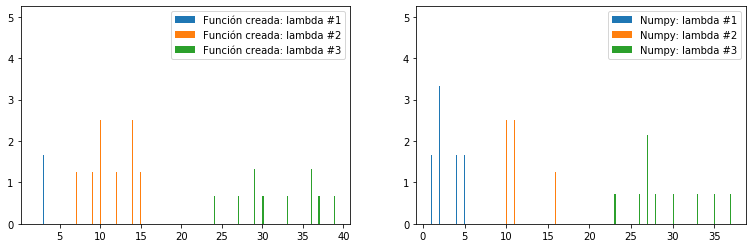

In [18]:
lamb = [4, 10, 30]
n = [12, 24, 48]; N = 10
#t = 2
p_acum =[P_acum_Poisson_o(n[i],lamb[i]) for i in range(len(lamb))]
u = np.random.rand(N)
#print(p_acum[t])
d_pois = [list(map(lambda j:sum(1 for i in p_acum[z] if i<u[j]),range(N))) for z in range(len(lamb))]

d_pois_numpy = [np.random.poisson(lamb[l],N) for l in range(len(lamb))]
#print(d_pois[t])

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
[plt.hist(d_pois[z],100,density=True,label='Función creada: lambda #%d'%(z+1)) for z in range(len(lamb))]
plt.legend()

plt.subplot(122)
[plt.hist(d_pois_numpy[z],100,density=True,label='Numpy: lambda #%d'%(z+1)) for z in range(len(lamb))]
plt.legend()
plt.show()


# 3
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [53]:
#Inversion en deuda:
n = 1000
Med_Deu = 0.235
Desv_Deu = 0.011

Deuda = np.random.normal(loc = Med_Deu, scale = Desv_Deu, size = n)

#Inversion plazo [uniforme]
Rent_li = -0.02
Rent_ls = 0.09

#Restriccion
Li_res = -0.005
Ls_res = 0.005

def Inversion2(Rent_li, Rent_ls, Li_res, Ls_res):
    rand = random.uniform(Rent_li, Rent_ls)
    #print('aleatorio 1: ',rand)
    while rand<Ls_res and rand>Li_res:
        rand = np.random.uniform(Rent_li, Rent_ls, 1)
    return rand
    

Inversion = [Inversion2(Rent_li, Rent_ls, Li_res, Ls_res) for x in range(n)]


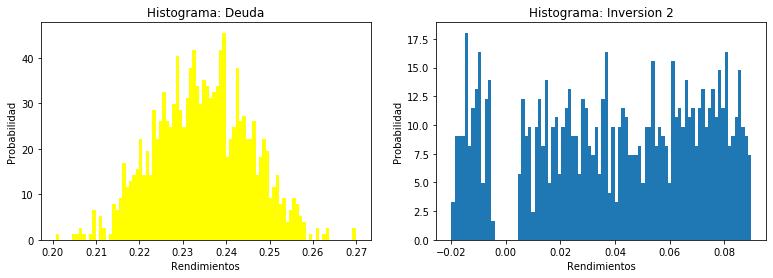

In [54]:
plt.figure(figsize=[13,4])
plt.subplot(121)
plt.hist(Deuda, density = True, bins = 90, color = 'yellow')
plt.title("Histograma: Deuda")
plt.xlabel("Rendimientos")
plt.ylabel("Probabilidad")

plt.subplot(122)
plt.hist(Inversion, density = True, bins = 90)
plt.title("Histograma: Inversion 2")
plt.xlabel("Rendimientos")
plt.ylabel("Probabilidad")
plt.show()

In [55]:
prom_deu = np.mean(Deuda)
prom_inv = np.mean(Inversion)

inv1 = (0.25*prom_deu + 0.75*prom_inv)
#print(inv1)
inv2 = (0.5*prom_deu + 0.5*prom_inv)
#print(inv2)
inv3 = (0.75*prom_deu + 0.25*prom_inv)
#print(inv3)
print(prom_deu)
print(prom_inv)

0.2345459188712979
[0.03940952]


In [56]:
x = range(n-1)
inv1 = [(0.25*Deuda[i] + 0.75*Inversion[i]) for i in x]
inv2 = [(0.50*Deuda[i] + 0.50*Inversion[i]) for i in x]
inv3 = [(0.75*Deuda[i] + 0.25*Inversion[i]) for i in x]


In [57]:
med_inv1 = np.mean(inv1)
print(med_inv1)
med_inv2 = np.mean(inv2)
print(med_inv2)
med_inv3 = np.mean(inv3)
print(med_inv3)

[0.08817437]
[0.13696819]
[0.185762]


In [58]:
print(np.std(inv1))
print(np.std(inv2))
print(np.std(inv3))

[0.02409237]
[0.01689575]
[0.01145447]


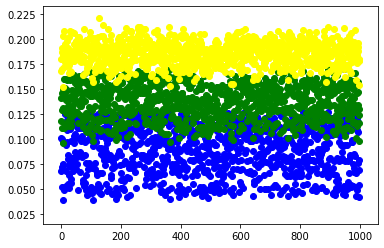

In [59]:
x = np.arange(0, len(inv1))
plt.scatter(x, inv1, color = 'blue')
plt.scatter(x, inv2, color = 'green')
plt.scatter(x, inv3, color = 'yellow')
plt.show()

<p <span style="color:gray; font-family:Times; font-size:1.2em;"> Conclusión: Debido a que en promedio, la primera inversion que es de deuda, tiene un mejor rendimiento esperado, evidentemente la mejor combinación es la amarilla, o sea inv3 donde es 75% de deuda (la primera inversion) y 25% de la segunda con un rendimiento promedio de 18.5762% con volatilidad de 1.1454% </span></p>

# 4
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.


$$ E [f(x)] =\int_{1}^{\infty}x400e^{-400(x-1)}\text{d}x = 400e^{400}\int_{1}^{\infty}xe^{-400x}\text{d}x $$
>
$$ E [f(x)] = 400e^{400} (\frac{x}{-400} e^{-400x} + \frac{1}{-160000}e^{-400x})|_{x = 1}^{x = \infty}$$
>
$$ E [f(x)] = 400e^{400} (\frac{\infty}{-400} e^{-400\infty} + \frac{1}{-160000}e^{-400\infty}) - 400e^{400} (\frac{1}{-400} e^{-400} + \frac{1}{-160000}e^{-400})$$
>
>La primera parte es cero, la segunda:
> $$ x = 401/400 = 1.0025$$

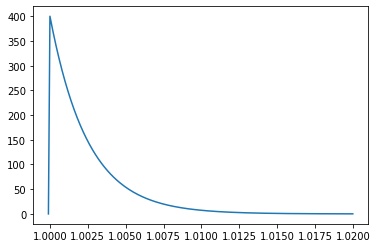

La media es:  1.0025


In [24]:
f = lambda x: 400*np.exp(-400*(x-1)) if x>= 1 else 0
li = 0.9999; ls = 1.02
x = np.arange(li,ls,0.0001)

fx = list(map(f,x))

plt.plot(x, fx)
plt.show()
Media = 401/400
print('La media es: ', Media)

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.


$$F(x)=\int_{1}^{x}400e^{-400(y-1)}\text{d}y = \left.\frac{-e^{-400(y-1)}}{}\right|_{y = 1}^{y = x}= -e^{-400(x-1)} -(-e^{-400(1-1)})$$
>
>Sabemos que la Función de densidad acumulada abarca el intervalo [0,1], por eso esto se iguala a _U_ (uniform)
>
>$$ U = -e^{-400(x-1)} + 1$$
>
>Despejar x
> $$ \ln {(1 - U)} = {-400(x-1)} $$
>
> 
> $$ \frac{\ln {(1 - U)}}{400}) = x - 1 $$
>
> $$ x = (1 - \frac{\ln {(1 - U)}}{400})$$

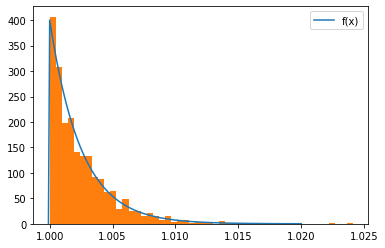

In [25]:
xi = lambda u: 1-np.log(u)/400

Ni = 1000
a =  np.random.uniform(0, 1, Ni)

muestra = np.asarray(list(map(xi, a)))

plt.plot(x,list(map(f,x)),label='f(x)')
plt.hist(muestra, density = True, bins = 50)
plt.legend()
plt.show()

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.


In [26]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variable distribuida U~U(0,1)',
                 R1:'Variable distribuida como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = np.asarray(list(map(f, R1)))
    t_x = t(R1)
    #print(f_x)
    #print(t_x)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    elem = [x for x in range(len(R1)) if condition[x]]
    return elem            
    plt.show()


[0.0, 0.07, 0.114]


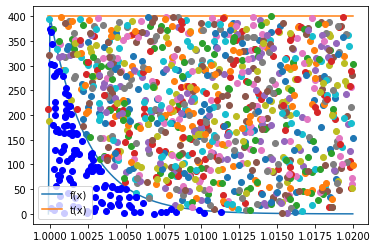

In [27]:
N = [10, 100, 1000]
x = np.arange(li,ls,0.0001)
f_x = np.asarray(list(map(f, x)))
# Máximo de la función f
#max_f = max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
max_f = 400
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

# Gráficas de las funciones
plt.plot(x,f_x,label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

#ans = Acep_rechazo(R2,R1,f,t)
ans = [Acep_rechazo(np.random.rand(n), np.random.rand(n)*(ls-li)+li, f, t) for n in N]

med_AR = [(len(ans[i]))/N[i]for i in range(len(N))]
print(med_AR)

In [28]:
k = 2
print(len(ans[k])/N[k])

0.114


**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

d). Use el método de montecarlo crudo para estimar la media.


In [29]:
rands =  [np.random.uniform(0, 1, i) for i in N]
muestras = np.asarray([np.asarray(list(map(xi, rand))) for rand in rands])
med_MC = [m.mean() for m in muestras]
print(med_MC)

[1.002018636066873, 1.002513652909594, 1.002531202280211]


e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.


In [30]:
def Random_Num(N, proporc, limit):
    R = [np.random.uniform(limit[i], limit[i+1], int(proporc[i]*N)) for i in range(len(proporc))]
    return R

def Weights(proporc, limit):
    W = [proporc[i]/(limit[i+1]-limit[i]) for i in range(len(proporc))]
    return W

def Estratif(xi, R, W):
    #Muestra con esta estratificacion
    muestras2 = list(map(lambda x: np.asarray(list(map(xi, x))), R))
    #Cada xi y dividirlo por wi
    Estratif1 = list(map(lambda x, wi: x/wi, muestras2, W))
    #Sacar la media, pero para poder hacer esto
    Estratif = np.concatenate(Estratif1)
    return Estratif


In [31]:
#En realidad no se puede poner cualquier N, ya que una proporción (15%) 
#No es posible tener 1.5 de numeros aleatorios de tal estrato
#Entonces N = 10 no estaría realmente correcto
proporc = [0.2, 0.2, 0.25, 0.15, 0.2] #Proporciones de cada estrato
limit = [0, 0.3, 0.5, 0.7, 0.9, 1] #Limites de cada estrato

#Numeros aleatorios
R = np.asarray([Random_Num(N[i], proporc, limit) for i in range(len(N))])
#Nuevas Ponderaciones
W = Weights(proporc, limit)

#Estratificar
muestras2 = [Estratif(xi, R[i], W) for i in range(len(N))]
#Media
med_Es = [m.mean() for m in muestras2]
print(med_Es)

[0.9945248587714468, 1.0025312022337856, 1.0024502987094643]


f). Use el método de los números complementarios.


In [32]:
#N = [10, 100, 1000]
def Complement(N, xi):
    u1 = np.random.rand(N)
    u2 = 1-u1
    U = [u1, u2]
    muestras3 = list(map(lambda u: np.asarray(list(map(xi, u))), U))
    return muestras3

muestras3 = [np.asarray(Complement(N[i], xi)) for i in range(len(N))]

#Media
med_Com = [m.mean() for m in muestras3]
print(med_Com)

[1.003281446614141, 1.002511903646624, 1.00245617761018]


g). Finalmente use el método de estratificación en el cúal se divide en N estratos.


In [33]:
def estratos(a, b, N):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    v = (U2+i)/N
    return v

In [34]:
B = [10, 100, 1000] #Numero de estratos

a =  np.asarray(list(map(lambda x: estratos(0, 1, x), B)))

muestras4 = np.asarray(list(map(lambda x: np.asarray(list(map(xi, x))), a)))

med_N_Est = [np.mean(muestras4[x]) for x in range(len(B))]
print(med_N_Est)

[1.002579850715056, 1.0025056884479953, 1.0024974636745168]


h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a). Se espera un resultado como el mostrado a continuación:
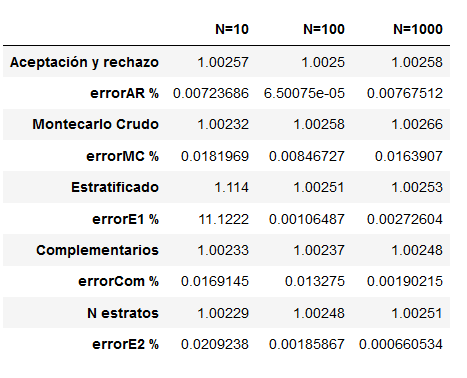

In [35]:
# Definimos la tabla donde se mostrarán los resultados

Ind = ['Aceptación y rechazo', 'errorAR%', 'Montecarlo Crudo', 'errorMC%', 'Estratificado', 'errorE1%', 'Complementarios', 'errorCom%', 'N estratos', 'errorE2%']
df = pd.DataFrame(index=Ind, columns = ['N=10', 'N=100', 'N=1000'], dtype='float')

# Mostramos los resultados en la tabla previamente creada

df.loc['Aceptación y rechazo'] = med_AR
df.loc['errorAR%'] = np.abs(np.asarray(med_AR)-Media)*100/Media

df.loc['Montecarlo Crudo'] = med_MC
df.loc['errorMC%'] = np.abs(np.asarray(med_MC)-Media)*100/Media

df.loc['Estratificado'] = med_Es
df.loc['errorE1%'] = np.abs(np.asarray(med_Es)-Media)*100/Media

df.loc['Complementarios'] = med_Com
df.loc['errorCom%'] = np.abs(np.asarray(med_Com)-Media)*100/Media

df.loc['N estratos'] = med_N_Est
df.loc['errorE2%'] = np.abs(np.asarray(med_N_Est)-Media)*100/Media

df

,N=10,N=100,N=1000
Aceptación y rechazo,0.000000,0.070000,0.114000
errorAR%,100.000000,93.017456,88.628429
Montecarlo Crudo,1.002019,1.002514,1.002531
errorMC%,0.048016,0.001362,0.003112
Estratificado,0.994525,1.002531,1.002450
errorE1%,0.795525,0.003112,0.004958
Complementarios,1.003281,1.002512,1.002456
errorCom%,0.077950,0.001187,0.004371
N estratos,1.002580,1.002506,1.002497
errorE2%,0.007965,0.000567,0.000253


<p <span style="color:gray; font-family:Times; font-size:1.2em;"> Conclusión: El método de aceptacion y rechazo fue el peor, ya que se utilizó una linea constante como funcion t, y la función exponencial tiene una area muy pequeña debajo de la curva entonces los que se aceptan son muy pocos a comparación de los que se rechazan</span></p>

# 5
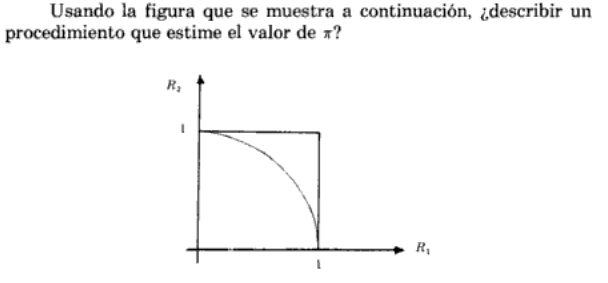

## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase, exprese el área bajo la curva como una integral.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *4*, para constrastar los resultados. Muestre los resultados en un dataframe como en el ejercicio *4-h)* y finalmente concluya  sus resultados.

3.141592653589793


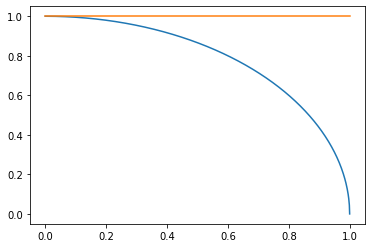

In [36]:
pi = math.pi
print(pi)
f = lambda x: (1-x**2)**(0.5)
n = 1000
x = np.linspace(0,1,n)
y = np.ones(n)
plt.plot(x, f(x))
plt.plot(x, y)
plt.show()

Sabemos que el area de un circulo es $\pi r^2$, entonces si sacamos el area bajo la curva de ese cuarto de circulo, lo multiplicamos por 4 nos debe de dar $\pi r^2$ donde el radio es 1, entonces daria $\pi $

In [37]:
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [38]:
#Montecarlo
N = [100,1000,10000,1000000]
a = 0
b = 1
U = np.random.rand(10)

MC = [4*(int_montecarlo(f,a,b,np.random.rand(num))) for num in N]
print(MC)
MC_error = (np.asarray(MC) - pi)*100/pi
print(MC_error)

[2.9181000653964144, 3.1228799627551913, 3.1375412575887527, 3.1412836655870953]
[-7.11399003 -0.59564345 -0.12895994 -0.00983539]


In [39]:
def Acep_rechazo(R2:'Variable distribuida U~U(0,1)',
                 R1:'Variable distribuida como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    elem = [x for x in range(len(R1)) if condition[x]]
    return elem            
    plt.show()

[2.4, 3.4, 3.164, 3.1712]


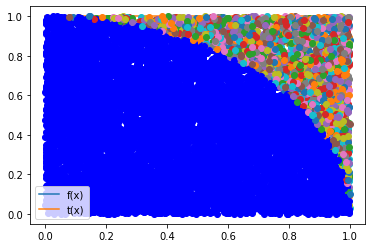

In [40]:
#Aceptacion y rechazo
#Tuve que poner otros numeros de N porque no terminaba
N = [10,100,1000,10000]
max_f = 1
# Función t -> Función constante
x = np.linspace(0,1,1000)
t = lambda x: max_f*np.ones(len(x)) # función constante

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


s = [Acep_rechazo(np.random.rand(n),np.random.rand(n),f,t) for n in N]
AC = [4*(len(s[i]))/N[i] for i in range(len(N))]
print(AC)

In [41]:
#Estratificado

proporc = [0.2, 0.2, 0.25, 0.15, 0.2] #Proporciones de cada estrato
limit = [0, 0.3, 0.5, 0.7, 0.9, 1] #Limites de cada estrato

#Numeros aleatorios
R = np.asarray([Random_Num(N[i], proporc, limit) for i in range(len(N))])
#Nuevas Ponderaciones
W = Weights(proporc, limit)

#Estratificar
muestras2 = [Estratif(f, R[i], W) for i in range(len(N))]
Est = [4*np.mean(muestras2[i]) for i in range(len(N))]

print(Est)

[3.1366812013293077, 3.1320534701422504, 3.1412625160688394, 3.144028061022507]


In [42]:
#Complementario
muestras3 = [np.asarray(Complement(N[i], f)) for i in range(len(N))]

Comp = [4*m.mean() for m in muestras3]
print(Comp)

[3.0988329434675217, 3.164081388655908, 3.154255933570999, 3.1426080489930626]


In [43]:
#N estartos
a =  np.asarray(list(map(lambda x: estratos(0, 1, x), N)))

muestras4 = np.asarray(list(map(lambda x: np.asarray(list(map(f, x))), a)))

N_Est = [4*np.mean(muestras4[x]) for x in range(len(N))]
print(N_Est)

[3.028320334810253, 3.136556593801903, 3.1415643344107793, 3.1415928410523652]


In [44]:
# Definimos la tabla donde se mostrarán los resultados

Ind = ['Aceptación y rechazo', 'errorAR%', 'Montecarlo Crudo', 'errorMC%', 'Estratificado', 'errorE1%', 'Complementarios', 'errorCom%', 'N estratos', 'errorE2%']
df2 = pd.DataFrame(index=Ind, columns = ['N=100', 'N=1000', 'N=10000', 'N=1000000'], dtype='float')

# Mostramos los resultados en la tabla previamente creada
df2.loc['Aceptación y rechazo'] = AC #Cambiar
df2.loc['errorAR%'] = np.abs(np.asarray(AC)-pi)*100/pi

df2.loc['Montecarlo Crudo'] = MC
df2.loc['errorMC%'] = np.abs(np.asarray(MC)-pi)*100/pi

df2.loc['Estratificado'] = Est
df2.loc['errorE1%'] = np.abs(np.asarray(Est)-pi)*100/pi

df2.loc['Complementarios'] = Comp
df2.loc['errorCom%'] = np.abs(np.asarray(Comp)-pi)*100/pi

df2.loc['N estratos'] = N_Est
df2.loc['errorE2%'] = np.abs(np.asarray(N_Est)-pi)*100/pi

df2

,N=100,N=1000,N=10000,N=1000000
Aceptación y rechazo,2.400000,3.400000,3.164000,3.171200
errorAR%,23.605627,8.225361,0.713248,0.942431
Montecarlo Crudo,2.918100,3.122880,3.137541,3.141284
errorMC%,7.113990,0.595643,0.128960,0.009835
Estratificado,3.136681,3.132053,3.141263,3.144028
errorE1%,0.156336,0.303642,0.010509,0.077521
Complementarios,3.098833,3.164081,3.154256,3.142608
errorCom%,1.361084,0.715839,0.403085,0.032321
N estratos,3.028320,3.136557,3.141564,3.141593
errorE2%,3.605570,0.160303,0.000901,0.000006


<p <span style="color:gray; font-family:Times; font-size:1.2em;"> Conclusión: El mejor método de reducción de varianza fue el de N estratos, ya que, como se puede ver fue el de menos error ya que es una asignación proporcional </span></p>

**Valor de los ejercicios**
- 1- 3 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 4 puntos
- 5- 2 puntos


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>